
2015/01/15  
The two calibration files are nearly equivalent and are compared in another notebook.  
Outliers are corrected in this version, giving for residuals 2.35 um rms on central region.

(*)There are only two reference points for this sample, so it is hard to quantify errors. #gwyddion finds 0.11-0.15 degrees for same data, this program from reference points finds -1.63, that is considerably different.
It is visible how the axis is not aligned after the rotation and I am not even sure it is improved wrt raw data. Align and data simmetry are corrected in this version and a basic treatment for outliers is introduced, considerably lowering the error (40 um in previous version).

In [1]:

%reset
%pylab
from pySurf.fit_cylinder import *
from pySurf.points import *
%load_ext autoreload
%autoreload 2


Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [2]:
%qtconsole

## Settings

In [3]:
#always run this
gfile=r'test_fitCylinder\bonding_data\150529BottomLeft_Center.txt'

In [4]:
p=get_points(gfile,matrix=1, xrange=[0,100],yrange=[0,100],delimiter=" ")*(1,1,-1)
pts1=crop_points(p,[23,80],[15,93])
plt.figure()
plot_points(p,shape=[57,78])
plt.title('original')
display(plt.gcf())
plt.figure()
plt.title('crop')
plot_points(pts1,shape=[57,78])
display(plt.gcf())

ValueError: Y is not correct size (or 2-el array)

## Cylinder fit

In [154]:
plt.close('all')

In [203]:

gfile=r'test_fitCylinder\PCO1S17_cylinder\110x60_100x500_xyscan_100Hz_Height.txt'
pts1=get_points(gfile)


In [204]:
odr0=(0,220.,0,0.) #use nominal value for guess direction

In [205]:
#create points to be fit from a subset of points.
pts=pts1[:]
#level plane
pts=level_points(pts)
pts[:,2]=pts[:,2]-pts[np.argsort(pts[:,2])[0],2]

deltaR,odr=fit_cylinder(pts,odr0,zscale=1000.,options={'maxiter':500},method='Nelder-Mead')
radius=cylinder_error3(odr,pts*[1,1,1./1000],extra=1)[-1] #this is a workaround to retrieve radius

plt.figure()
plot_points(deltaR)

-----------------------------------
Results of fit on region (function: <function cylinder_error3 at 0x000000002F02D048>):
X: [ 0.000,110.000]
Y: [ 0.000,60.000]
data range: [ 0.000, 2.192]
---
  status: 1
    nfev: 802
 success: False
     fun: 0.62521596822262959
       x: array([  3.67190126e+09,   1.51996449e+06,  -9.48793919e+09,
        -3.91829640e+06])
 message: 'Maximum number of function evaluations has been exceeded.'
     nit: 460
Angle of cyl axis with y axis (deg):
90.0
Radius:
3554.82247987
Axis Parameters:
[  3.67190126e+09   1.51996449e+06  -9.48793919e+09  -3.91829640e+06]
---
rms residuals=625.215968223 um
resampling...


array([[ -539.34213789,  -539.38565016,  -539.42916243, ...,
         -587.11858716,  -587.16209943,  -587.2056119 ],
       [ -539.36311991,  -539.40663218,  -539.45014445, ...,
         -587.13956945,  -587.18308172,  -587.22659418],
       [ -539.45441826,  -539.49793054,  -539.5414428 , ...,
         -587.23086712,  -587.27437939,  -587.31789185],
       ..., 
       [-1027.17818708, -1027.22169344, -1027.2651998 , ...,
        -1074.94814588, -1074.99165223, -1075.03515856],
       [-1035.49534532, -1035.53885158, -1035.58235784, ...,
        -1083.26519293, -1083.30869919, -1083.35220541],
       [-1043.88279047, -1043.92629662, -1043.96980278, ...,
        -1091.65252594, -1091.69603209, -1091.73953821]])

resampling...


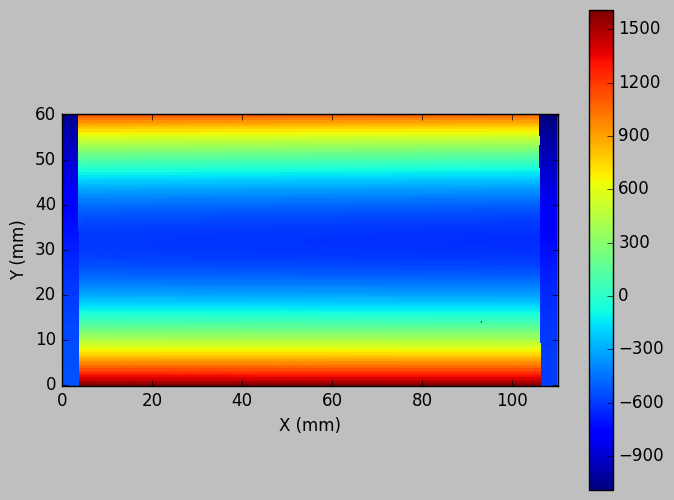

In [206]:
plt.figure()
plot_points(deltaR)
display(plt.gcf())

## test alignment correction

In [189]:
plt.close('all')

resampling...
-----------------------------------
Results of fit on region (function: <function cylinder_error3 at 0x000000002F02D048>):
X: [23.000,80.000]
Y: [15.000,93.000]
data range: [ 0.000, 0.051]
---
  status: 0
    nfev: 531
 success: True
     fun: 0.014440213494010248
       x: array([  2.07486572e+02,   5.38997399e+07,  -5.52097053e+02,
        -2.01075039e-06])
 message: 'Optimization terminated successfully.'
     nit: 259
Angle of cyl axis with y axis (deg):
89.8962216578
Radius:
53899739.8653
Axis Parameters:
[  2.07486572e+02   5.38997399e+07  -5.52097053e+02  -2.01075039e-06]
---
rms residuals=14.440213494 um


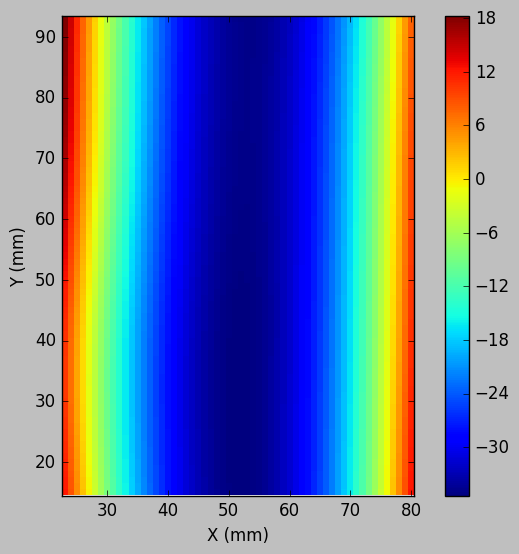

resampling...


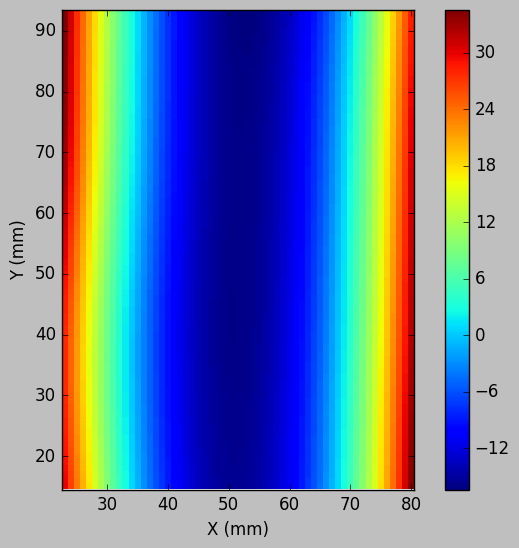

In [190]:
#repeat last calculation points.
pts=pts1[:]
plt.figure()
plot_points(pts)


#level plane ot make radius guess easier
pts=level_points(pts)
pts[:,2]=pts[:,2]-pts[np.argsort(pts[:,2])[0],2]

deltaR,odr=fit_cylinder(pts,odr0,zscale=1000.,options={'maxiter':500},method='Nelder-Mead')
radius=cylinder_error3(odr,pts*[1,1,1./1000],extra=1)[-1] #this is a workaround to retrieve radius

display(plt.gcf())
plt.figure()
plot_points(deltaR)
display(plt.gcf())

-----------------------------------
Results of fit on region (function: <function cylinder_error3 at 0x000000002F02D048>):
X: [23.000,80.000]
Y: [15.000,93.000]
data range: [ 0.000, 0.051]
---
Angle of cyl axis with y axis (deg):
89.8962216579
Radius:
53899739.8837
Axis Parameters:
[  2.07486572e+02   5.38997399e+07  -5.52097053e+02  -2.01075039e-06]
---
rms residuals=14.4402136478 um
resampling...


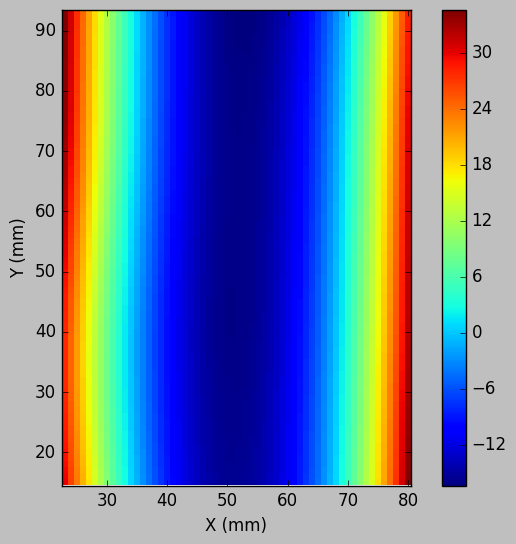

In [193]:
deltaR,odr=fit_cylinder(pts,np.array([  2.07486572e+02,   5.38997399e+07,  -5.52097053e+02,
        -2.01075039e-06]),zscale=1000.)
plt.clf()
plot_points(deltaR)
display(plt.gcf())

In [194]:
odr0

(0, 220.0, 0, 0.0)

-----------------------------------
Results of fit on region (function: <function cylinder_error3 at 0x000000002F02D048>):
X: [22.838,79.974]
Y: [15.040,93.139]
data range: [-0.000, 0.051]
---
  status: 0
    nfev: 532
 success: True
     fun: 0.014440214167367084
       x: array([  2.21405897e+02,   5.75154376e+07,  -5.89133297e+02,
        -8.85181741e-06])
 message: 'Optimization terminated successfully.'
     nit: 255
Angle of cyl axis with y axis (deg):
89.9027457372
Radius:
57515437.6197
Axis Parameters:
[  2.21405897e+02   5.75154376e+07  -5.89133297e+02  -8.85181741e-06]
---
rms residuals=14.4402141674 um
resampling...


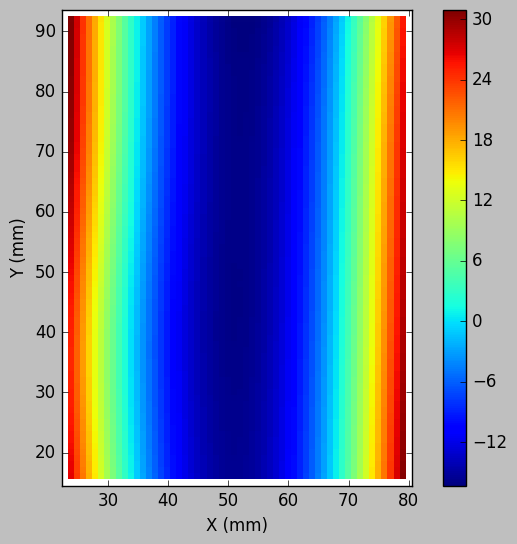

In [195]:
pp2=rotate_points(pp,0.5/180*np.pi)
#plt.clf()
#plot_points(pp2)
#display(plt.gcf())


pp2=level_points(pp2)
pp2[:,2]=pp2[:,2]-pp2[np.argsort(pp2[:,2])[20],2]
#plt.clf()
#plot_points(pp2)
#display(plt.gcf())

deltaR,odr=fit_cylinder(pp2,odr0,zscale=1000.,options={'maxiter':500},method='Nelder-Mead')
radius=cylinder_error3(odr,pp2*[1,1,1./1000],extra=1)[-1] #this is a workaround to retrieve radius
plt.clf()
plot_points(deltaR)
display(plt.gcf())

In [196]:
deltaR,odr=fit_cylinder(pp2,odr0,zscale=1000.,options={'maxiter':500},method='Nelder-Mead')
pp2=level_points(pp2)
pp2[:,2]=pp2[:,2]-pp2[np.argsort(pp2[:,2])[20],2]
deltaR,odr=fit_cylinder(pp2,odr0,zscale=1000.,options={'maxiter':500},method='Nelder-Mead')
radius=cylinder_error3(odr,pp2*[1,1,1./1000],extra=1)[-1] #this is a workaround to retrieve radius


-----------------------------------
Results of fit on region (function: <function cylinder_error3 at 0x000000002F02D048>):
X: [22.838,79.974]
Y: [15.040,93.139]
data range: [-0.000, 0.051]
---
  status: 0
    nfev: 532
 success: True
     fun: 0.014440214167367084
       x: array([  2.21405897e+02,   5.75154376e+07,  -5.89133297e+02,
        -8.85181741e-06])
 message: 'Optimization terminated successfully.'
     nit: 255
Angle of cyl axis with y axis (deg):
89.9027457372
Radius:
57515437.6197
Axis Parameters:
[  2.21405897e+02   5.75154376e+07  -5.89133297e+02  -8.85181741e-06]
---
rms residuals=14.4402141674 um
-----------------------------------
Results of fit on region (function: <function cylinder_error3 at 0x000000002F02D048>):
X: [22.838,79.974]
Y: [15.040,93.139]
data range: [-0.000, 0.051]
---
  status: 0
    nfev: 532
 success: True
     fun: 0.014440214167367084
       x: array([  2.21405897e+02,   5.75154376e+07,  -5.89133297e+02,
        -8.85181741e-06])
 message: 'Optimi

resampling...


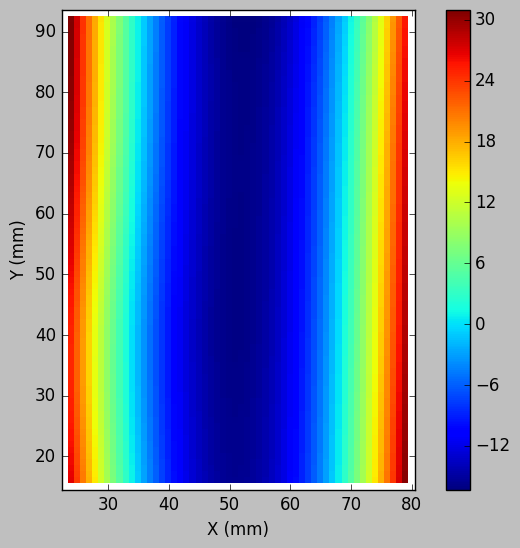

In [197]:
plt.figure()
plot_points(level_points(deltaR))
display(plt.gcf())

resampling...


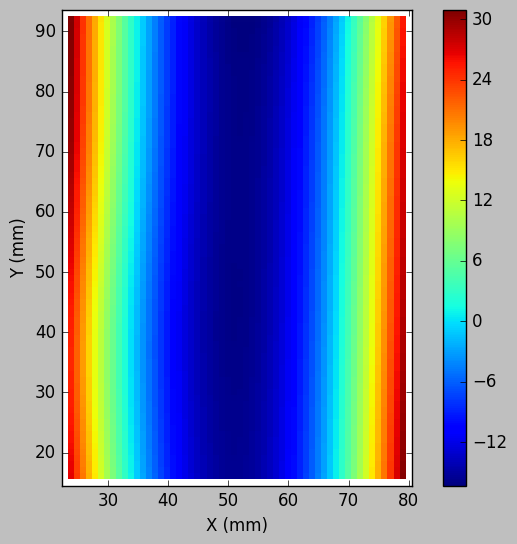

In [198]:
plt.clf()
plot_points(deltaR)
display(plt.gcf())

In [199]:
deltaR

array([[ 22.97378504,  15.04011971,  29.86333519],
       [ 23.97378352,  15.04186503,  26.56684816],
       [ 24.973782  ,  15.04361036,  23.41785282],
       ..., 
       [ 77.83756566,  93.13599397,  21.69687301],
       [ 78.83756414,  93.13773929,  24.92494881],
       [ 79.83756262,  93.13948462,  28.30912918]])

## cylinder vs cone

In [60]:
#cone is correct for OP2, 

fit_func=cone_error    #this is the function giving the FOM to be minimized
def p(x): print x #,cylinder_error(x,points)
outSubfix='_cone' #the name of output file is the datafile with this subfix added
datafile=r'test_fitCylinder\OP2S04b_cone\04_OP2S04_xyscan_Height_transformed.dat'
#datafile='OP2S03c/22_OP2S03_yxsurf_Height_transformed.dat'
#datafile='OP2S04/04_OP2S04_xyscan_Height_transformed.dat'
#datafile='OP2S05/05_OP2S05_xysurf_Height_transformed.dat'


#create points to be fit from a subset of points.
pts=get_points(datafile,delimiter=' ')
#pts=rotate_points(pts,-np.pi/2)
pts=crop_points(pts,(-28,33),(-75,65))
#pts[:,2]=pts[:,2]/1000.
c=crop_points(pts,(-28,33),(-50,50))    #[0:-1:1000,:]
odr2=(33,220.,0,0,220)



result=minimize(fit_func,x0=(odr2[0:-1],),args=(c,),options={'maxiter':1000},callback=p,method='Nelder-Mead')
print '-----------------------------------'
print 'Results of fit on subset of points:'
print result    

#create output results applying the value from fit to all points
odr=result.x
fom,deltaR,coeff=fit_func(odr,pts,extra=True)
origin=(odr[0],0,odr[1])
direction=(odr[2],1.,odr[3])
deltaR[:,2]=deltaR[:,2]*1000
print '-----------------------------------'
print 'Results of fit applied to complete set of points:'
print 'F.O.M.=%s'%(fom)

plot_points(deltaR,vmin=-5,vmax=10,scatter=1,aspect='equal')
save_points(deltaR,filename=fn_add_subfix(datafile,outSubfix))
plt.savefig(fn_add_subfix(datafile,outSubfix,'.png'))



C:\Users\Vincenzo\Google Drive\libraries\python\userKov\pySurf\fit_cylinder.py:97: RuntimeWarning: invalid value encountered in divide
  vd=direction/((np.array(direction)**2).sum())  #normalize vector, not sure it is necessary.
C:\Users\Vincenzo\Google Drive\libraries\python\userKov\pySurf\fit_cylinder.py:10: RuntimeWarning: invalid value encountered in divide
  vd=lVersor/np.sqrt(np.sum(np.array(lVersor)**2))  #normalize vector, not sure it is necessary.


ValueError: shapes (488003,3) and (1,) not aligned: 3 (dim 1) != 1 (dim 0)

In [60]:
#fit cylinder with new interface

fit_func=cone_error    #this is the function giving the FOM to be minimized
def p(x): print x #,cylinder_error(x,points)
outSubfix='_cone' #the name of output file is the datafile with this subfix added
datafile=r'test_fitCylinder\OP2S04b_cone\04_OP2S04_xyscan_Height_transformed.dat'
#datafile='OP2S03c/22_OP2S03_yxsurf_Height_transformed.dat'
#datafile='OP2S04/04_OP2S04_xyscan_Height_transformed.dat'
#datafile='OP2S05/05_OP2S05_xysurf_Height_transformed.dat'


#create points to be fit from a subset of points.
pts=get_points(datafile,delimiter=' ')
#pts=rotate_points(pts,-np.pi/2)
pts=crop_points(pts,(-28,33),(-75,65))
#pts[:,2]=pts[:,2]/1000.
c=crop_points(pts,(-28,33),(-50,50))    #[0:-1:1000,:]
odr2=(33,220.,0,0,220)

deltaR,odr=fit_cylinder(pp2,(0,50.,np.cos(0.1)-0.1,0.),zscale=1000.,options={'maxiter':500},method='Nelder-Mead')
radius=cylinder_error3(odr,pp2*[1,1,1./1000],extra=1)[-1] #this is a workaround to retrieve radius

result=minimize(fit_func,x0=(odr2[0:-1],),args=(c,),options={'maxiter':1000},callback=p,method='Nelder-Mead')
print '-----------------------------------'
print 'Results of fit on subset of points:'
print result    

#create output results applying the value from fit to all points
odr=result.x
fom,deltaR,coeff=fit_func(odr,pts,extra=True)
origin=(odr[0],0,odr[1])
direction=(odr[2],1.,odr[3])
deltaR[:,2]=deltaR[:,2]*1000
print '-----------------------------------'
print 'Results of fit applied to complete set of points:'
print 'F.O.M.=%s'%(fom)

plot_points(deltaR,vmin=-5,vmax=10,scatter=1,aspect='equal')
save_points(deltaR,filename=fn_add_subfix(datafile,outSubfix))
plt.savefig(fn_add_subfix(datafile,outSubfix,'.png'))



C:\Users\Vincenzo\Google Drive\libraries\python\userKov\pySurf\fit_cylinder.py:97: RuntimeWarning: invalid value encountered in divide
  vd=direction/((np.array(direction)**2).sum())  #normalize vector, not sure it is necessary.
C:\Users\Vincenzo\Google Drive\libraries\python\userKov\pySurf\fit_cylinder.py:10: RuntimeWarning: invalid value encountered in divide
  vd=lVersor/np.sqrt(np.sum(np.array(lVersor)**2))  #normalize vector, not sure it is necessary.


ValueError: shapes (488003,3) and (1,) not aligned: 3 (dim 1) != 1 (dim 0)

In [ ]:
#test level points

from pySurf.points import _get_plane

d=data[~np.isnan(data[:,2]),:] #irrelevant, plane_fit excludes nans
plane=_get_plane(d)

points=d[:]
points=subtract_points(points,plane,resample=0)
print points
print d
print plane

plt.figure(1)
plt.clf()
plot_points(plane)
plt.figure(2)
plt.clf()
plot_points(points)
plt.figure(3)
plt.clf()
plot_points(d)
